<a href="https://colab.research.google.com/github/CresGallego/convolutional_neural_network/blob/main/convolutional_neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT DEPENDENCIES and othe needed packages
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import time
import matplotlib.pyplot as plt
import random as rand

In [2]:
"""
DESIGN THE MODEL FOR CONVOLUTIONAL NEURAL NETWORK
  We use the Keras
  Sequential type of model breakdowns task into sub-tasks that are executed one after another in a predefined pattern.
  Sub-tasks here are the following Keras layers:
    Conv2D - to A filter or a kernel that “slides” over the 2D input data, performing an elementwise multiplication
      and then summing the results. We use 64 filters with 3 by 3 pixel size as parameters, activation function is Rectified Linear Unit 'relu',
      28 by 28 pixel input images is defined as the input_shape.
    MaxPooling2D - downsamples the input along its spatial dimensions (height and width) by taking the maximum value
      over an input window (of size defined by pool_size ). Pool dimension is 2 by 2 pixel is collapsed into 1 pixel carrying the max value
    Flatten  -  reduces the input data into a single dimension instead of 2 dimensions
    Dense - feeds all outputs from the previous layer to all its neurons, each providing one output to the next layer
      Input Dense layer has 128 neurons and oputput layer has 10 neurons representing 10 categories of garments and footwear.
      ReLU is the activation function in the input layer (to zero out negative values).
      Softmax is the activation function in the output layer (to transform the outputs into a vector of probabilities).
"""

model = models.Sequential([
    layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
"""
COMPILE THE MODEL
  Optimizer is Adaptive Moment Estimation 'adam' is good for this case as it is faster and efficient for training.
  Loss function is sparse_categorical_crossentropy, appropriate as it is memory-efficient for large class datasets.
  Accuracy is what we need to see for metrics.
"""

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
"""
PERFORM ETL (Extract, Transform, Load)
  Extract data to training and test data sets using load_data() method inherent from data object.
  The data.load() method returns 2 tuples (first tuple has 1 array for the training_images and the other
    array is for the training_labels, the 2nd tuple is for the test_images and test_labels array)
    It is the method that splits this into 60k images for first tuple and 10k images for 2nd tuple
"""

data = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = data.load_data()

# Transform the data
train_images = train_images.reshape(60000,28,28,1)
train_images = train_images / 255.0

test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# design callback function to stop at the desired accuracy
"""
CALLBACK FUNCTION
  Create a callback to stop the training of the model when accuracy reached 93% (to avoid over fitting).
  The callback is defined here and will be used as a parameter later in training the model.
  Callback will stop at certain point in training (epochs) when it achieved the desired accuracy and so need not continue all the epochs set in parameter.
"""

desired_accuracy = 0.96
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>.95):
      print(f"\nReached the desired accuracy of {round(desired_accuracy*100)}%, so halting the training.")
      self.model.stop_training = True

callbacks = myCallback()

In [6]:
"""
TRAIN THE MODEL / LOAD THE DATA
  With the callback, we LOAD the training_images as 'x' input parameter and training_labels as 'y' output target parameter,
  Arbitrarily we put 50 as the number of epochs (to iterate the datasets 50 times), unless stop by callback when desired accuracy is attained.
  Time function is used to capture the time before and after the training just to see how long is the training took.
"""

start_time = time.time()
model.fit(train_images,train_labels, epochs=50, callbacks=[callbacks])
end_time = time.time()
print(f"\nThe training took {round(end_time-start_time)} seconds.")

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7876 - loss: 0.5857
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8896 - loss: 0.2995
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9100 - loss: 0.2460
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9201 - loss: 0.2123
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9304 - loss: 0.1853
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9398 - loss: 0.1612
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9472 - loss: 0.1381
Epoch 8/50
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9560 - loss: 0.1163
Reached the desired accuracy of 96%, so halting the training.
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9560 - loss: 0.1164

The training took 75 seconds.


In [7]:
# evaluate the model using test data sets to check for accuracy and or to check if there is overfitting
loss, accuracy = model.evaluate(test_images, test_labels)
print("\nEvaluation result:")
print(f"Accuracy : {round(accuracy*100)}%")
print(f"Loss     : {round(loss*100)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9071 - loss: 0.2950

Evaluation result:
Accuracy : 91%
Loss     : 27%


In [8]:
# summary of the CNN model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,360 (2.79 MB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,574 (1.86 MB)

In [9]:
# class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
classifications = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


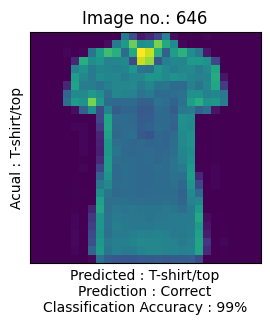

In [22]:
# display the random image and show the predicted label and actual label
rand_test_image = rand.randint(0,10000)
predicted_label = classifications[rand_test_image].argmax()
actual_label = test_labels[rand_test_image]
classification_accuracy = round(classifications[rand_test_image][predicted_label] * 100)

def is_prediction_correct(predicted_label, actual_label):
  if (predicted_label == actual_label):
    prediction = "Correct"
  else:
    prediction = "Wrong"
  return prediction

prediction = is_prediction_correct(predicted_label, actual_label)

plt.figure(figsize=(3,3))
plt.imshow(test_images[rand_test_image])
plt.title(f"Image no.: {rand_test_image}")
plt.xlabel(f"Predicted : {class_names[predicted_label]}\nPrediction : {prediction}\nClassification Accuracy : {classification_accuracy}%")
plt.ylabel(f"Acual : {class_names[actual_label]}")
plt.xticks([])
plt.yticks([])
plt.show()